## read all SIX csv files and create pandas datafram

In [14]:
from pandas import read_csv, MultiIndex, concat
from collections import namedtuple
from datetime import time,datetime
import matplotlib.pyplot as plt
import codecs
import os
%matplotlib inline

In [194]:
def get_pfad():
    '''
    returns path for different files as needed per PC
    '''

    Context = namedtuple('contexts', 'pfadKGAST, pfadSIX')
    pfade = ['c:/users/gfi 64bit/',
             'c:/users/gerar/',
             'c:/users/gérard/']
    try:
        pfad = [pfad for pfad in pfade if os.path.exists(pfad)][0]
    except:
        pfad = ''
        raise FileNotFoundError('Zuerst gültigen Pfad definieren!')
    pfad += 'dropbox/KGAST Daten/'
    context = Context(pfad + 'KGASTxls/', pfad + 'SIXcsv/')
    return context

def get_itd(filename):
    ''' read intraday csv file and return a dataframe with:
    MultiIndex : Name = name of index, datetime 
    Price, Volume '''
    # read header information
    with codecs.open(filename, encoding='latin', errors='replace') as myfile:
        ind_name, datum = myfile.readlines()[:2]
    ind_name =ind_name.strip('\r\n').replace(u'\xa0', u' ')
    datum = datum.strip().strip(';')
    tag, monat, jahr = datum.strip().strip(';').split('.')
    # read price data
    df = read_csv(p.pfadSIX+fname, sep=';', skiprows=2, usecols=[0, 1, 2])
    df.columns = [col.strip() for col in df.columns.tolist()]
    x = lambda zeit : datetime(int(jahr), int(monat), int(tag), int(zeit[-8:-6]), int(zeit[-5:-3]), int(zeit[-2:]))
    # create new columns for indexing and set multiindex
    df['Time'] = df.Time.map(x)
    df['Name'] = ind_name
    return df.set_index(['Time'])

In [195]:
fn = p.pfadSIX+fname
get_itd(fn).head(1)

,Price,Volume,Name
Time,,,
2017-02-10 17:31:26,9256.15,0,SPI® TR (SXGE/CH0009987501)


In [196]:
p = get_pfad()
print(p.pfadSIX, ' -- ',p.pfadKGAST)
fnames = os.listdir(p.pfadSIX)
fnames =[fname for fname in fnames if 'SXitd' in fname] # keep intraday
print(fnames[1])

c:/users/gfi 64bit/dropbox/KGAST Daten/SIXcsv/  --  c:/users/gfi 64bit/dropbox/KGAST Daten/KGASTxls/
SXitd_CHSPI_2016-10-18_185758.csv


In [249]:
dflist = []
for fname in fnames:
    dflist.append(get_itd(p.pfadSIX + fname))  
df = concat(dflist).drop_duplicates()
df.sort_index(inplace=True)
df.Volume = df.Volume.map(lambda x: None if x == 0 else x)
funds = df.Name.drop_duplicates().tolist()
#funds = df.index.get_level_values(0).drop_duplicates().tolist()
df.info()
spi = funds[1]
funds, spi

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16226 entries, 2016-10-18 09:00:36 to 2017-02-10 17:31:26
Data columns (total 3 columns):
Price     16226 non-null float64
Volume    4433 non-null float64
Name      16226 non-null object
dtypes: float64(2), object(1)
memory usage: 507.1+ KB


(['iShares Core SPI (CH) (CHSPI/CH0237935652)',
  'SPI® TR (SXGE/CH0009987501)',
  'UBS ETF SPI (CHF) A (SPICHA/CH0131872431)'],
 'SPI® TR (SXGE/CH0009987501)')

In [250]:
faktoren = {}
for fund in funds:
    startwert = df[df.Name == fund].Price[0]
    print(fund, startwert)
    faktoren[fund] = 1 / startwert * 100

df['Faktor'] = df.Name.map(lambda x:faktoren[x])
df['PriceAdj'] = df.Price * df.Faktor

iShares Core SPI (CH) (CHSPI/CH0237935652) 99.43
SPI® TR (SXGE/CH0009987501) 8780.78
UBS ETF SPI (CHF) A (SPICHA/CH0131872431) 52.69


In [251]:
df[df.Name == funds[0]]

,Price,Volume,Name,Faktor,PriceAdj
Time,,,,,
2016-10-18 09:00:36,99.43,63.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.000000
2016-10-18 09:03:11,99.92,62.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.492809
2016-10-18 09:23:48,100.18,200.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.754300
2016-10-18 09:24:38,100.17,35.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.744242
2016-10-18 09:39:48,100.00,200.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.573268
2016-10-18 09:44:16,100.10,390.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.673841
2016-10-18 10:02:56,100.11,570.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.683898
2016-10-18 10:21:24,100.10,154.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.673841
2016-10-18 10:45:24,100.04,52.0,iShares Core SPI (CH) (CHSPI/CH0237935652),1.005733,100.613497


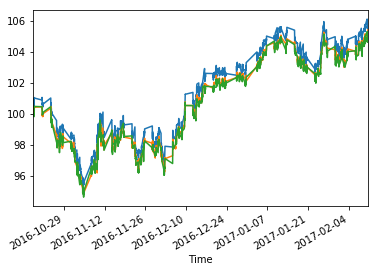

In [253]:
for fund in funds:
    df[df.Name == fund].PriceAdj.plot()